# Foundations of AI: Assignment 1

**Group 2**

## Introduction

This notebook presents an analysis of a gym memberships dataset using exploratory data analysis (EDA), statistical hypothesis testing, and linear regression techniques. The objective of the analysis is to formulate and investigate three research questions that examine different aspects of member behaviour and outcomes within the dataset.

Exploratory data analysis is used to understand the structure of the data, identify patterns, and highlight potential data quality issues. Where appropriate, statistical hypothesis testing is applied to assess whether observed relationships are statistically significant. In addition, linear if appropriate for a research question, linear regression modelling is used.

The findings and limitations to our approach are elaborated on in this notebook.

## Research Questions

The dataset contains information on gym members that can be broadly grouped into:
- **Demographic data** (e.g. age, gender)
- **Actionable behavioral data** (e.g. session length, water intake)
- **Descriptive behavioral data** (e.g. training frequency, experience level)
- **Descriptive workout data** (e.g. workout type)
- **Actionable workout outcomes** (e.g. calories burned per session)
- **Health-indicating data** (e.g. BMI, weight, height, body fat percentage)

Based on these categories, the following research questions were formulated to explore
different aspects of the data:

1. **Is there a statistically significant difference in daily water intake among beginner,
   intermediate, and expert gym members?**  
This question examines how a member’s long-term status (descriptive behavioral variable) relates to their session-to-session behavior (actionable behavioral variable). It is suitable for hypothesis testing using an ANOVA or for analysis via regression.

2. **Can a gym member’s body fat percentage be predicted using workout habits and demographic
   characteristics?**  
Body fat percentage is an important health indicator that often requires invasive or time-consuming measurements. By analyzing its relationship with other variables, we can estimate body fat percentage from readily available data. This question is suitable for analysis using linear regression.

3. **Is there a statistically significant difference in the average number of calories burned per
   session across different workout types?**  
This question investigates how a descriptive workout variable (workout type) influences an actionable workout outcome (calories burned). It can be addressed using hypothesis testing (ANOVA) or regression analysis.

### Justification

These research questions were selected because they:
- Reflect key variables present in the dataset  
- Cover descriptive, inferential, and predictive analyses  
- Are suitable for the applied methods of statistical hypothesis testing and regression analysis


## Load Dataset and Initial Analysis

We import the libraries to be used for this assignment

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

The dataset has been provided in a CSV file *GymMembers.csv*. We load it into a pandas DataFrame:

In [3]:
df = pd.read_csv("GymMembers.csv")

Going over the first 5 rows in the dataframe

In [7]:
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


We can see that the dataset contains categorical, ordinal and continuous data:
1. Categorical: Gender, Workout type
2. Ordinal: Experience Level
3. Continous: The remainder of the variables are continuous

In [8]:
feature_names = df.columns
print(f"The dataset has {len(feature_names)} features. These are:")
for name in feature_names:
    print(f"{name}")

The dataset has 15 features. These are:
Age
Gender
Weight (kg)
Height (m)
Max_BPM
Avg_BPM
Resting_BPM
Session_Duration (hours)
Calories_Burned
Workout_Type
Fat_Percentage
Water_Intake (liters)
Workout_Frequency (days/week)
Experience_Level
BMI


We run info() on the datafrome to get the datatypes and find if we have any missing values that need to be handled via imputation or dropping

In [11]:
df.info()
print(f"We have {df.isna().any().sum()} missing values")

<class 'pandas.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    str    
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    str    
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int64  
 13  E

we run describe() on the continuous variables in the dataset to get summary statistics and confirm whether all the features (columns) have acceptable ranges

In [12]:
df_quant = df.drop(columns=['Gender','Workout_Type','Experience_Level'])
df_quant.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,49.840000


The features are within the acceptable range for these variables. So, we do not need to drop any columns or perform any manipulations

For our categorical and ordical data we retrieve the value counts.

In [13]:
df['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [14]:
df['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [15]:
df['Experience_Level'].value_counts()

Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64

Gender and Workout type category are fairly balanced and so do not require special consideration before performing tests. However, the *experience level* category has significant class imbalance and will need to be handled before any hypothesis testing.

## Exploratory Data Analysis

We will perform an exploratory data analysis (EDA) to get a more in depth view of the data:
- We plot histograms of our target variables to understand central tendency and variability of the classes.
- we visualise boxplots of the categorical and ordical classes to confirm class imbalances.
- We create a correlation matrix to identify collinearity between continuous classes

### Count Plots for Categorical/Ordinal Data

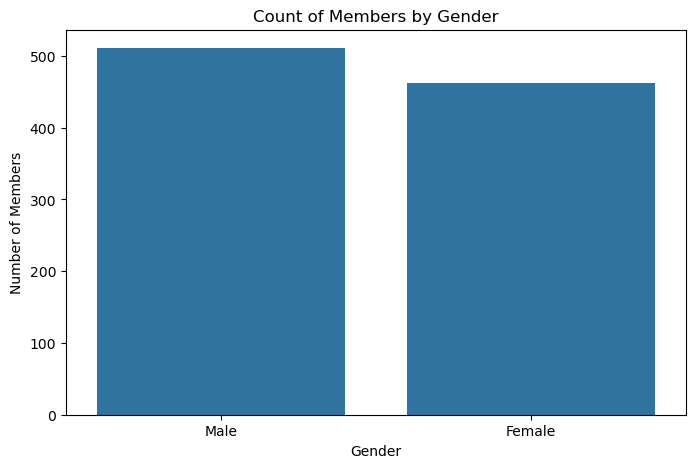

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Gender")
plt.title("Count of Members by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Members")
plt.show()

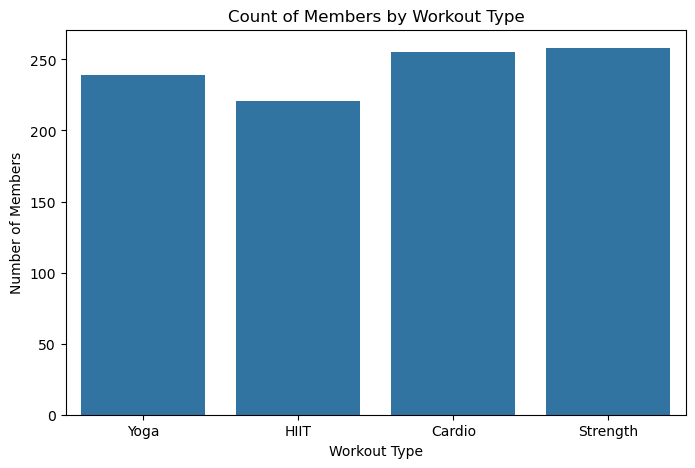

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Workout_Type")
plt.title("Count of Members by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Number of Members")
plt.show()

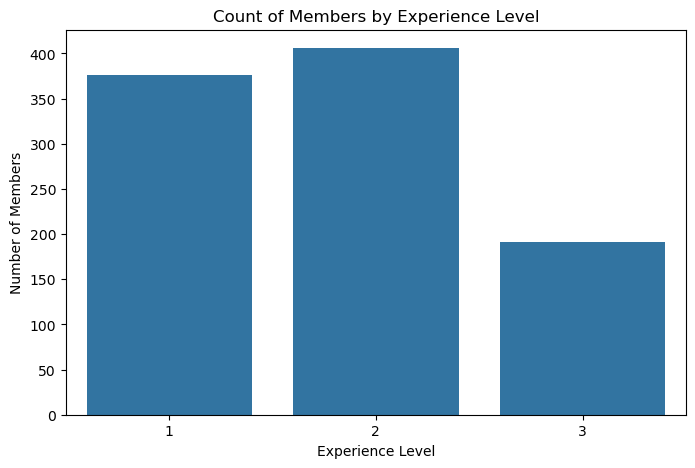

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Experience_Level")
plt.title("Count of Members by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Number of Members")
plt.show()

### Target Variable Distribution

The visualisations of experience level count further highlights how the class has a significant imbalance with experience level 3 having far fewer members. This is an expenced behaviour as having expert members will be less likely. However, this will still have an outsized impact on our analysis especially for question 1 and so will need to be handled.

<Axes: xlabel='Water_Intake (liters)', ylabel='Count'>

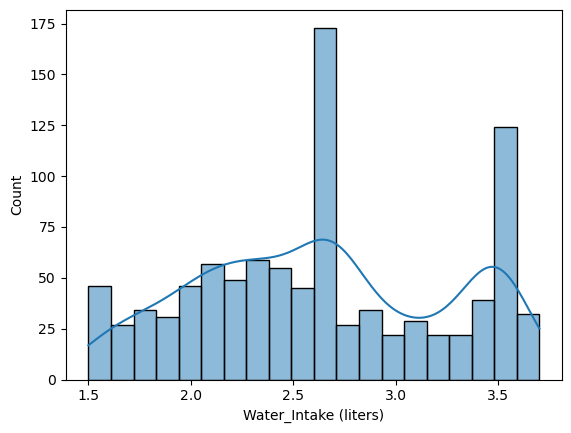

In [36]:
sns.histplot(data=df,x="Water_Intake (liters)", bins=20, kde=True)

This histogram shows that we have two significant peaks at 2.75l and 3.5l. So, the water intake data has a bimodal distribution without any skew. This will effect our analysis for question 1 as hypothesis testing via ANOVA assumes unimodal normal distribution.

<Axes: xlabel='Fat_Percentage', ylabel='Count'>

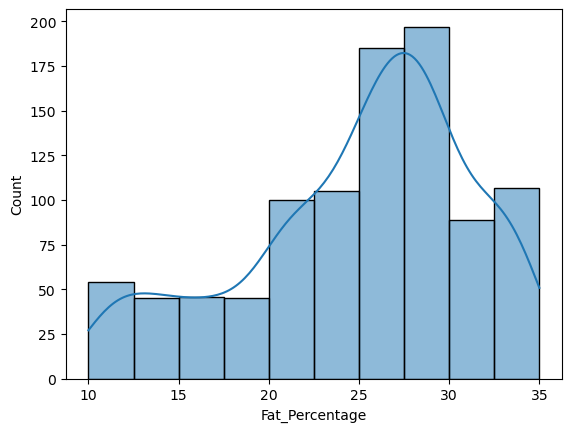

In [40]:
sns.histplot(data=df,x="Fat_Percentage", bins=10, kde=True)

The histogram for fat percentage shows  is notmally distributed, but with a significant left sjew. So, this may need to be accounted for when creating model for question 2.

<Axes: xlabel='Calories_Burned', ylabel='Count'>

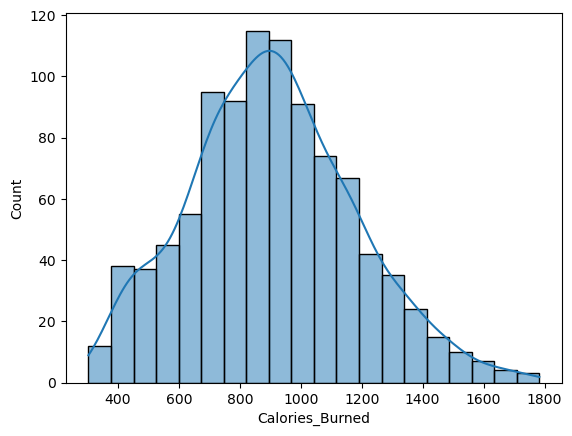

In [38]:
sns.histplot(data=df,x="Calories_Burned", bins=20, kde=True)

The distribution of calories burned per session is approximately normal with a slight right skew, indicating that most gym members burn between 700 and 1100 calories per session, with the peak around 900–1000 calories. A few sessions have much higher calorie expenditure, which may represent
high-intensity workouts or outliers. Overall, this distribution suggests that calories burned can be compared across groups using parametric methods like ANOVA, though care should be taken to check assumptions in subsequent analyses.

### Correlation Matrix
We create a correlation matrix of the continous variables to find whether multicollinearity exists. This will confirm whether our features can be used to predict/infer target variables.

In [42]:
df_quant.corr()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.013691
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.853158
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,-0.032543
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.119258
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.213697


<Axes: >

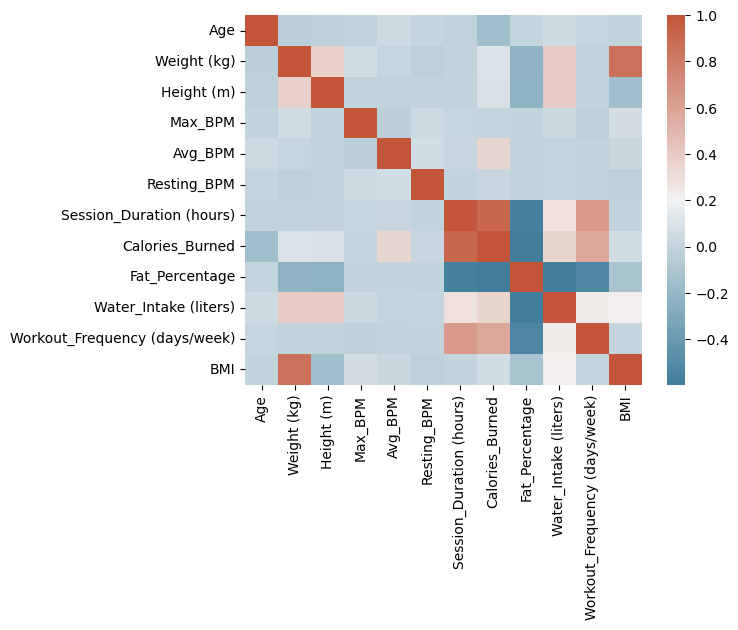

In [44]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_quant.corr(), cmap=cmap)

The correlation analysis revealed several notable relationships among the physiological and performance variables.
1. As expected, a near-perfect positive correlation was observed between Session Duration and Calories Burned (r = 0.908), validating the internal consistency of the dataset.
2. Water Intake showed a moderate positive correlation with both Weight (r = 0.394) and Height (r = 0.393), indicating that larger individuals tend to consume more water. More importantly, Water Intake demonstrated a strong negative correlation with Fat Percentage (r = -0.589), suggesting that higher hydration levels are associated with lower body fat.
3. Higher session duration and workout frequency—showed weak-to-moderate positive correlations with Water Intake (r = 0.283 and r = 0.239, respectively), providing preliminary evidence that more experienced members (who train longer and more frequently) tend to have higher water intake, though body size and composition appear to be stronger drivers.
4. Jigh multicollinearity was detected between BMI and Weight (r = 0.853), indicating they should not be used together in predictive models.